# NFL News Analysis 

As I am seeking to make the NFL more intelligent, here are some development ideas on putting together some interesting stats based on related NFL news articles that i've been collecting.

### Imports

In [1]:
import pandas as pd

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style


import some NFL stats for future correlations
pulled from [pro-football-references.com](https://www.pro-football-reference.com/years/2018/) and power rankings from usatoday _keyword: NFL power rankings, post-Week 5 edition:_

In [2]:
standings = pd.read_csv('standings.csv')
standings = standings.sort_values(['week'], ascending=[True])

standings.head()

,team,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS,Season,week,prior_week,post_week
0,bears,0,1,0,0.0,23.0,24.0,-1.0,-1.0,1.0,0.0,0.0,0.0,2018,1,19,18
31,vikings,1,0,0,1.0,24.0,16.0,8.0,8.0,-8.0,0.0,0.0,0.0,2018,1,7,4
30,titans,0,1,0,0.0,20.0,27.0,-7.0,-7.0,7.0,0.0,0.0,0.0,2018,1,14,27
29,texans,0,1,0,0.0,20.0,27.0,-7.0,-7.0,7.0,0.0,0.0,0.0,2018,1,11,14
28,steelers,0,0,1,0.5,21.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,2018,1,10,12


Lets select some teams and plot the `W-L%` (win and loss percentage) as the weeks progress for the 2018 NFL Season

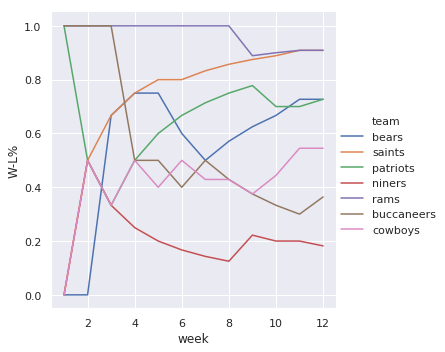

In [3]:
teams = ['cowboys', 'bears', 'rams', 'saints', 'patriots', 'buccaneers', 'niners']

sns.relplot(x='week', y = 'W-L%', ci=None, hue="team",
            kind="line", data = standings[standings.team.isin(teams)])

This looks like a good distribution of teams for this practice exercise.

### File Preparations

Open Files

In [4]:
import glob
all_files = glob.glob("./rss_feed/spyder_*")  
nfl_new = pd.concat(pd.read_csv(f) for f in all_files)
nfl_new = nfl_new.reset_index(drop=True)
nfl_new = nfl_new.drop('0', axis = 1)
nfl_new[nfl_new.team=='cowboys'].head()

/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


,date,keywords,team,text,title,url
291,2018-10-22,"['game', '4th', 'highlights', 'locker', 'zero'...",cowboys,Highlights From Michael Gallup's Breakout Game...,Locker Room Reaction: 4th Straight Road Loss,https://www.dallascowboys.com/video/locker-roo...
292,2018-10-22,"['ls', 'movement', 'moments', 'thoughts', 'lad...",cowboys,LS L.P. Ladouceur address the media following ...,"Locker Room: L.P. Ladouceur "" I Don’t Do Anyth...",https://www.dallascowboys.com/video/locker-roo...
293,2018-10-22,"['game', 'highlights', 'maher', 'locker', 'imp...",cowboys,Highlights From Michael Gallup's Breakout Game...,"Locker Room: Brett Maher ""That Penalty Had Zer...",https://www.dallascowboys.com/video/locker-roo...
294,2018-10-22,"['game', 'highlights', 'gallups', 'breakout', ...",cowboys,Highlights From Michael Gallup's Breakout Game...,Highlights From Michael Gallup's Breakout Game...,https://www.dallascowboys.com/video/highlights...
295,2018-10-22,"['doing', 'trade', 'second', 'amari', 'cooper'...",cowboys,Dallas Cowboys owner Jerry Jones didn’t talk f...,Dallas Cowboys: Cowboys are doing homework on ...,https://www.star-telegram.com/sports/nfl/dalla...


For this practice, lets only look at news articles from preseason till this point (Week 5) from the teams inidcated during the standings analysis

In [5]:
nfl = nfl_new[nfl_new.team.isin(teams)]

A couple of manual fixes on game dates

In [6]:
nfl.loc[nfl.url== 'http://www.joebucsfan.com/2018/10/206302/', 'date'] = pd.to_datetime('2018-10-04 00:00:00').date()

/home/redne/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


add game weeks to each article

In [7]:
def game_weeks(df):
    """
    Create dataset indicate the game week. 
    # https://github.com/JVP3122/Python-Machine-Learning-NFL-Game-Predictor/blob/master/binary_class.py
    """
    
    week_dict = {}
    first_game_date = df.min().date()
    game_date = first_game_date
    season_start_date = pd.to_datetime('2018-09-04 00:00:00').date()
    last_game_date = df.max().date()
    week_num = 1 # start week 1 and increment from there
    
    for i in range((last_game_date - first_game_date).days+1):
        if game_date <= season_start_date:
            week_dict[game_date] = 0
            game_date += datetime.timedelta(days=1)
        else:
            if game_date.weekday() == 1: # check if weekday is Tuesday.. if so reset week_number
                week_num += 1
            week_dict[game_date] = week_num
            game_date += datetime.timedelta(days=1)
    
    week_list = pd.Series(week_dict).to_frame()[0]
    
    return week_list

In [8]:
import datetime

nfl['date'] = pd.to_datetime(nfl['date'])
nfl = nfl.sort_values(['date'], ascending=[True])

/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
d = game_weeks(nfl.date)
for o,j in enumerate(d.index):
    nfl.loc[nfl.date == j, 'week'] = d[o]

/home/redne/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and 'the values will not compare equal to the
'datetime.date'. To retain the current behavior, convert the
'datetime.date' to a datetime with 'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until


### Data Processing & Exploratory

lets visualize the distribution of articles per each team. 

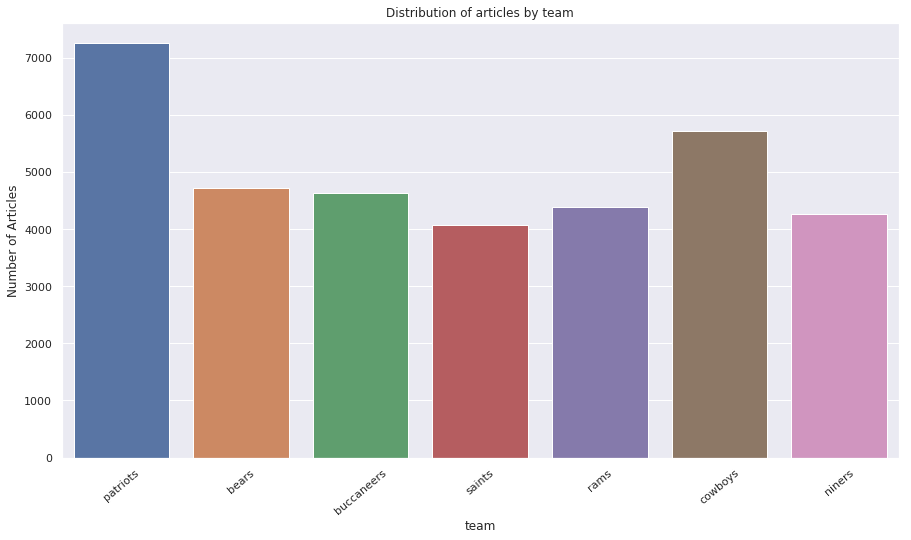

In [10]:
fig = plt.figure(figsize=(15,8))
ax = sns.countplot(x="team", data=nfl)
ax.set(xlabel='team', ylabel = 'Number of Articles')
ax.set_xticklabels(labels=nfl.team.unique(),rotation=40)
plt.title("Distribution of articles by team")
plt.show()

Merge the `nfl_standings` based on weekly performance with the nfl articles for analysis.

In [11]:
nfl_standings = standings[['W-L%','week','team']]
nfl = nfl.merge(nfl_standings, on=['team','week'])

### Data Cleaning

remove any empty text rows

In [12]:
nfl = nfl[~nfl.text.isnull()].reset_index(drop=True)

In [13]:
import re

def preprocess_post(post):
    post = ''.join(c for c in post if not c.isdigit())
    post = post.lower()
    post = re.sub('\n', ' ', post)
    #post = re.sub(r'[^\w\s]','',post)
    
    
    return post

In [14]:
nfl['text'] = nfl['text'].map(lambda x : preprocess_post(x))
#nfl['title'] = nfl['title'].map(lambda x : preprocess_post(x))

## Sentiment Analysis

Sentiment analysis is a process that allows us to each a computer to understand if the opinion expressed in a text is either: (1) positive, (2) negative, or (3) neutral. In this section we are going to apply sentiment analysis to the NFL news articles that we gathered other the 2018 season from various channels that we scapped from. The results from the sentiments provides us important insights about the media and public opion and perception towards the teams, players, matchups and performance throughout the season. 

At a high level, sentiment analysis works by consuming a clean and pre-processes set of textual documents. In this section we will use all articles that we scrapped. We have previously cleansed. For practical purposes, we will use the article in its entirety and we did not capture any of the comments section associated with the article. The result is an output of the sentiment prediction made for the entire article. 

In this section we are only capturing the complete sentiment from the article. Its noteworthy to mention that we will be predicting the sentiment from verious topics that are discussed within the document. In later analysis, we will perform entity-level analysis oppose to document level analsyis which is what we are performing here. Entity-level analysis allows us to predict sentiments associated with individual entities such as team: cowboys (team in question) and panthers (opponent) and players: Dak Prescott (QB), Ezekiel Elliot (RB). 

For more on entity level sentiment anlaysis refer to the next section.

Inspiration: http://blog.aylien.com/using-entity-level-sentiment-analysis-to-understand-news-content/

In [15]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def news_sentiment(nfl):
    sentiments = []
    
    sid = SentimentIntensityAnalyzer()
    for article in nfl['text']:
        ss = sid.polarity_scores(article)
        sentiments.append(ss)    
    
    sentiments = pd.DataFrame(sentiments)
    # print high level statistics
    print('high level statistics from the news_sentiment articles analysis of all teams: /n')
    print(sentiments.describe())
    nfl_sent = pd.concat([nfl, sentiments], axis = 1)
    return nfl_sent 

/home/redne/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [16]:
nfl_sent = news_sentiment(nfl)

high level statistics from the news_sentiment articles analysis of all teams: /n
           compound           neg           neu           pos
count  27774.000000  27774.000000  27774.000000  27774.000000
mean       0.506044      0.057264      0.831224      0.111505
std        0.660990      0.042189      0.070589      0.061563
min       -0.999600      0.000000      0.287000      0.000000
25%        0.102700      0.028000      0.790000      0.074000
50%        0.900100      0.054000      0.829000      0.110000
75%        0.989200      0.081000      0.870000      0.143000
max        1.000000      0.436000      1.000000      0.627000


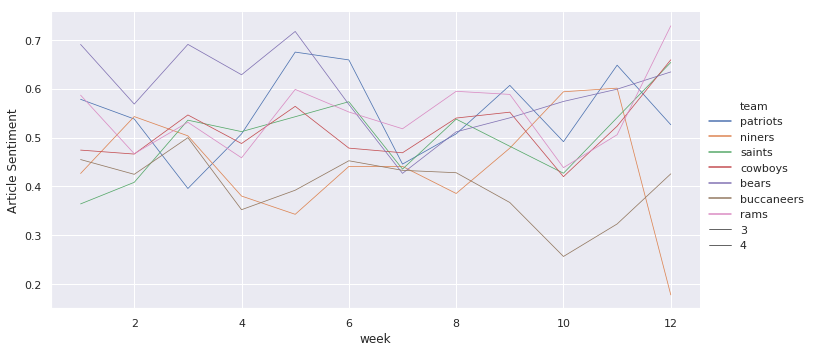

In [17]:
ax = sns.relplot(x="week", y="compound", kind="line", hue='team', ci=None, data=nfl_sent, size=4, aspect = 2)
ax.set(xlabel='week', ylabel = 'Article Sentiment')

Lets visualize the data using a `box plot` to depict the distribution of the `compound sentiment` for each team by week. This enables us to have a way to compare the individual article sentiment for each team. 

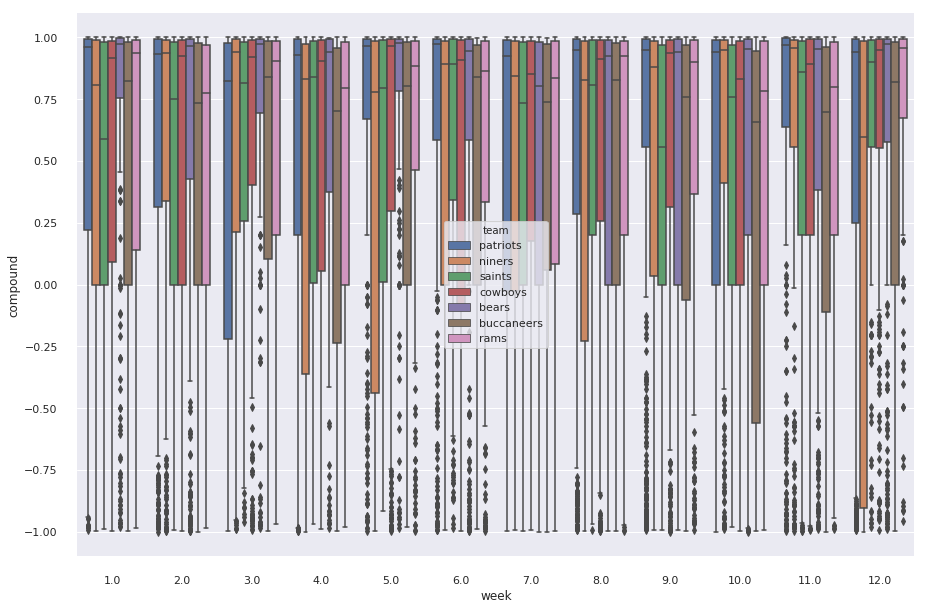

In [18]:
plt.figure(figsize=(15,10))
sns.boxplot(x="week", y='compound', hue='team', data=nfl_sent)
sns.despine(offset=10, trim=True)

See the distribution of article sentiment specifically for the cowboys. 

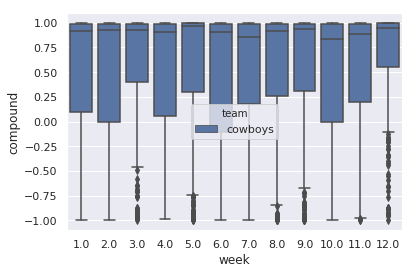

In [19]:
sns.boxplot(x="week", y='compound', hue='team', data=nfl_sent[nfl_sent.team=='cowboys'])

### Sentiment Analysis @ Sentense Level

Just playing the field of various sentiment analyzers and sentiment analysis approaches. In this section we will see if there is a different in analyzing the sentiment from the acticles if we perform the sentiment analysis at the sentense level verses the article level. 

Inspiration: https://github.com/amanthedorkknight/News-Sentiment-Analysis/blob/master/extract_sentiment.ipynb

In [20]:
def news_sentiment_sentence(nfl):
    analyzer = SentimentIntensityAnalyzer()
    sentiment = pd.DataFrame(columns=('Positive', 'Negative', 'Neutral', 'Compound'))
    counter = 0

    for article in nfl['text']:
        article_compound = 0
        article_neg = 0
        article_pos = 0
        article_neu = 0
        counter = counter + 1
        
        sentences = sent_tokenize(article)
        l = len(sentences)
    
        for sentence in sentences:
            vs = analyzer.polarity_scores(sentence)
            article_compound = article_compound + vs['compound']
            article_neg = article_neg + vs['neg']
            article_pos = article_pos + vs['pos']
            article_neu = article_neu + vs['neu']
        article_sentiment = pd.DataFrame([[article_pos/l, article_neg/l, article_neu/l, article_compound/l]], columns=('Positive', 'Negative', 'Neutral', 'Compound'))
        sentiment = sentiment.append(article_sentiment, ignore_index = True)
        
    # print high level statistics
    print('high level statistics from the news_sentiment sentense analysis of all teams: /n')
    print(sentiment.describe())
    sent_sent = pd.concat([nfl, sentiment], axis = 1)
    return sent_sent

high level statistics from the news_sentiment sentense analysis of all teams: /n
           Positive      Negative       Neutral      Compound
count  27774.000000  27774.000000  27774.000000  27774.000000
mean       0.100221      0.051427      0.843629      0.123603
std        0.063153      0.040910      0.073645      0.205791
min        0.000000      0.000000      0.205099     -0.973800
25%        0.062808      0.023222      0.808897      0.004652
50%        0.093955      0.046714      0.846542      0.106494
75%        0.127159      0.071630      0.882614      0.207020
max        0.627000      0.554500      1.000000      0.988600


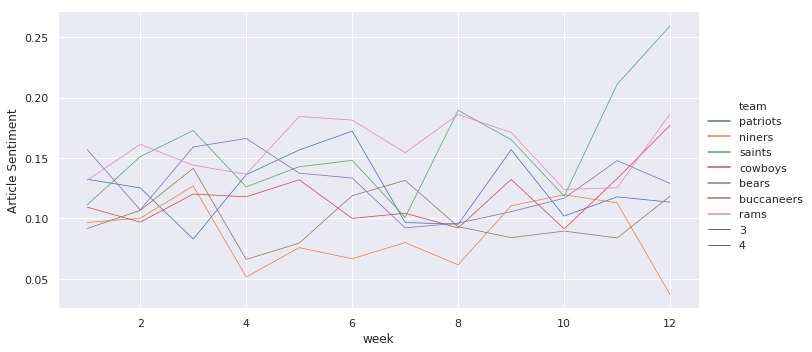

In [21]:
sent_sent = news_sentiment_sentence(nfl)
ax = sns.relplot(x="week", y="Compound", kind="line", hue='team', ci=None, data=sent_sent, size=4, aspect = 2)
ax.set(xlabel='week', ylabel = 'Article Sentiment')

Here was the previous sentiment anlaysis just so we can compare approaches.

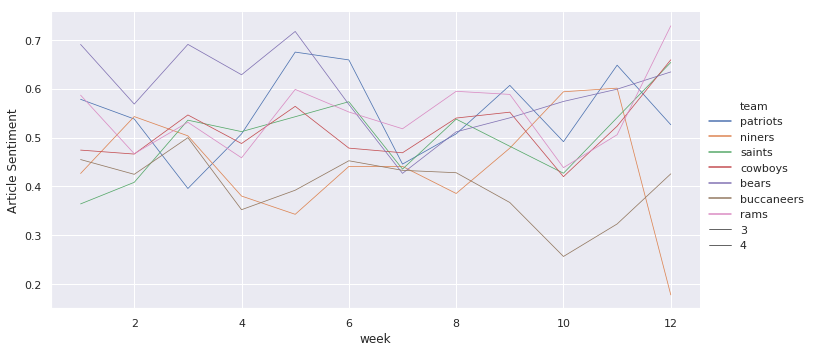

In [22]:
ax = sns.relplot(x="week", y="compound", kind="line", hue='team', ci=None, data=nfl_sent, size=4, aspect = 2)
ax.set(xlabel='week', ylabel = 'Article Sentiment')

/home/redne/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


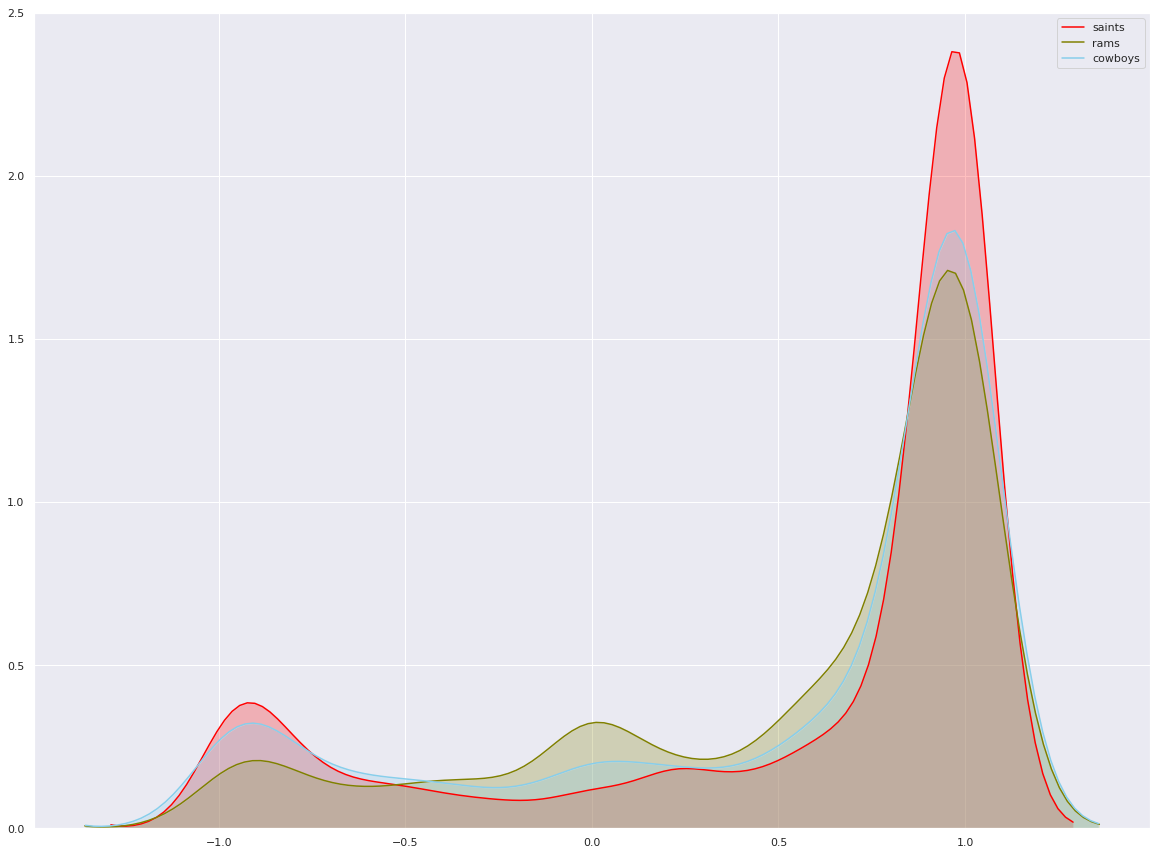

In [23]:
plt.figure(figsize=(20,15))
sns.set(color_codes=True)
sns.kdeplot(nfl_sent[nfl_sent.team=='patriots']['compound'],shade=True,color='red',label='saints')
sns.kdeplot(nfl_sent[nfl_sent.team=='rams']['compound'],shade=True,color='olive',label='rams')
sns.kdeplot(nfl_sent[nfl_sent.team=='cowboys']['compound'],shade=True,color='skyblue',label='cowboys')
plt.legend()

Seems that when we perform sentiment anlaysis at the sentense level, while the discribution seems to be similar, the actual values are extremely lower. 

save nfl dataframe to csv

In [24]:
nfl_sent.to_csv('nfl_news_w11_sent.csv' , encoding='utf-8', index=False)